# HW4 due 5p Fri April 30, 2021

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.
You can do the Group work portion in class with your classmates on Wednesdays to get full credit, but you can choose to do that portion individually and submit it along with your hw for a grade (i.e. you will not automatically get full credit). 

You are welcome to use analytical and numerical computational tools; if you do, include the **commented** sourcecode in your submission (e.g. the .ipynb file).

You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup (e.g. the .ipynb file).

**Important:** before you do any work in the Colaboratory notebook, click "File -> Save a copy in Drive ..." and rename the file to something memorable.

**Also important:** To produce a .pdf for submission to Canvas, click "File -> Print" (or press Ctrl/Cmd + P), and choose "Save to PDF" or "Microsoft Print to PDF" as your printer.


# Group work -- Wed April 28

I encourage you to attend the group work session on Wednesdays to complete the group work portion of your homework -- you will get full credit as long as you participate and make an effort on the problem. This is also a great opportunity to get to know your classmates. Only one person needs to submit.

Please note that only one person can edit the Colaboratory notebook at a time, I recommend creating a copy for yourself and copy pasting your solutions in the discord or Zoom chat if people want to work on different parts of the writeup.

## 0. Groupmates: [Names of everyone in your group]

## 1. [30 min] step response of a linear system

Consider (a version of) the second-order (DE) we discussed last week 
$$(\text{DE})\text{    } \ddot{q}+2\zeta\omega_0\dot{q} + \omega_0^2 q = u, \text{    } y=q$$
where $\zeta$ is referred to as the dampening ratio for the system and $\omega_0$ is referred to as the natural frequency of the system.

Rewriting the (DE)s of interest in this canonical second order form as we did in hw3 can be helpful because depending on our choices of $\zeta$, we can tune how our system responds to a step input (e.g., having the desired reference go from 0 mph to 60 mph). 

<img src="https://drive.google.com/uc?id=1IefNbB8AffW8dlDnlKlilejanzn5ZgQ8" width=500px>

a. (ungraded, don't have to do if submitting individually): Pick a system to discuss (like cruise control but pick something else). When an input is applied, what kind of response do you think would be ideal for your system, and why? 

b. Rewrite $(\text{DE})$ as a function of states $x=\left[\begin{matrix} q \\ \dot{q}\end{matrix}\right]$ and input $u$ such that $f(x,u)=\dot{x}=Ax+Bu$. Additionally, find $C$ and $D$ matrices such that $h(x,u) = y = Cx+Du$

---
**SOLUTION**
The derivative of $x$ is 
$$\dot{x} = \left[\begin{array}{c} \dot{q} \\ -2\zeta\omega_0 \dot{q} - \omega_0^2 q + u \end{array}\right]$$

For this equation, we have


$$ A = 
\left[
\begin{array}{cc}
0 & 1 \\ -\omega_0^2 & -2\zeta\omega_0
\end{array}
\right],
$$

and

$$
B = 
\left[
  \begin{array}{c}
  0 \\ 1
  \end{array}
  \right]
$$

esponse to a unit step $u(t) = 1 \text{ if } t\geq0, u(t)=0 \text{ if } t< 0$, i.e., find the steady state response to a unit step input. If you need, you can assume that $\zeta = 1,\omega_0=2$.

---
**SOLUTION**
In the time domain, the solution $x(t)$ to $\dot{x} = Ax + Bu$ for $u = u(t)$ is given by the following formula, which captures the homogeneous solution and the particular solution:

$$ x(t) = x(0) e^{At} + \int_{\tau=0}^{\infty}e^{A(t-\tau)}B u(\tau) d\tau .$$

In this problem $x(0) = 0$ so we only need to calculate the second term. Furthermore $u(\tau) = 1$ for all $\tau > 0$. Hence the unit step response is provided by

$$y(t) = C \int_{\tau=0}^{t} e^{A(t-\tau)}d\tau B.$$

Since $A$ is invertable, we have

$$ \int_{\tau=0}^{t} e^{A(t-\tau)}d\tau = 
\left[
  -A^{-1}e^{A(t-\tau)}
  \right]_{\tau=0}^{\tau=t}  = CA^{-1}e^{At}B - CA^{-1}B
  $$

since $A$ is stable (all eigenvalues have negative real part) then we know that $\lim_{t\to\infty} e^{At} = 0$. Using this, we can determine the steady-state response

$$ \lim_{t\to\infty}y(t) = -CA^{-1}B $$

---
d. Determine the transfer function $G_{yu}$, where $y=q$.

---
**SOLUTION**

The transfer function $G_{yu}$ is readily obtained from the original DE.

$$ G_{yu}(s) = \cfrac{1}{ s^2+2\zeta\omega_0 s + \omega_0^2} $$

---

e. Use the transfer function you just found in c. to obtain the steady state response to a unit step input (*hint: you should get the same answer as you did in b. Use the final value theorem.*)

--- 
**SOLUTION**
The final value theorem states that the response $y$ to an input $u$ must satisfy

$$ \lim_{t->\infty} y(t) = \lim_{s\to 0} sy(s)$$

using the transfer function above, we can show that 

$$ \lim_{s\to 0} sy(s) = \lim_{s\to 0} s G_{yu}(s) u(s) =
\lim_{s\to 0} \cfrac{s}{s^2+2\zeta\omega_0 s + \omega_0^2}\cfrac{1}{s} = \cfrac{1}{\omega_0^2} $$

---

## 2. [60 min] linearization of nonlinear system

A steel ball with mass $M$ is levitated under an electromagnet. The input $u$ to the system is the voltage applied to the electromagnet. The output $y$ is the position of the ball (illustrated as $x$ in the diagram, but denoted as $q$ in the equations below) and is measured with a photo-detector. The system is illustrated below.

<img width=500px src="https://raw.githubusercontent.com/klavins/ECE447/master/images/levitation-up.png">

This system involves dynamic interaction between the ball's position $q$, velocity $\dot{q}$, and the electromagnet current $i$:

$$
(\text{NL})\quad
\ddot q = \frac{C}{M}\left(\frac{i}{q}\right)^2 - g,\ 
\dot i = \frac{1}{L} \left ( -R i + 2 C \frac{i \dot{q}}{q^2} + u \right )
$$

(For convenience, the positive direction for $q$ is down.)

(a.) Determine the constant input voltage $u_e$ that makes $q_e = 0.05$ an equilibrium position.

---
**SOLUTION**
From the first equation we have that 

$$ i_e = \sqrt{\cfrac{Mg}{C}}q_e, $$

whereas from the second equation since $\dot{q}_e = 0$ (this is necessary for an equilibrium) we have


$$ u = Ri_e = R\sqrt{\cfrac{Mg}{C}}q_e = 0.05R\sqrt{\cfrac{Mg}{C}} $$

---


(b.) Linearize the nonlinear system $(\text{NL})$ around the equilibrium from (a.) to obtain a linear system $(\text{L})$

$$ (\text{L})\quad \delta \dot{x} = A \delta x + B \delta u,\ \delta y = C \delta x + D \delta u. $$

Use the following parameter values in the remainder of this problem:
magnet constant $C = 10^{-4}$,
gravitational acceleration $g = 9.81$,
inductance $L = 1$,
resistance $R = 30$,
mass $M = 12\times 10^{-3}$.

---
**SOLUTION**

First we linearize the $\ddot{q}$ equation,

$$ 
\delta \ddot{q} = 
\left( -2\cfrac{Ci_e^2}{Mq_e^3} \right)\delta q + \left( 2\cfrac{Ci_e}{Mq_e^2} \right)\delta i.
$$

Next we linearize the $\dot{i}$ equation,

$$
\delta \dot{i} = -\cfrac{R}{L}\delta i + 2\cfrac{Ci_e}{Lq_e^2}\delta \dot{q} + \delta u
$$

Notice that there is no $\delta q$ term here: this is a consequence of the fact that $\dot{q}_e = 0$. Finally we substitute all of the values into the expression above:

$$ \delta \ddot{q} \approx -392 \delta q + 11.4 \delta i $$

$$ \delta \dot{i} \approx  -30 \delta i + 0.137 \delta \dot{q} + \delta u.$$

If $\delta x = [\delta q,\, \delta \dot{q},\, \delta i]^\top$

$$ 
A \approx \left[ \begin{array}{ccc}
0 & 1 & 0 \\
-392 & 0 & 11.4 \\
0 & 0.137 & -30
\end{array}\right]
$$

$$B = [0,\,0,\,1]^\top$$

and of course since $y=q$, then $\delta y = \delta q$ and so $C = [1,\,0,\,0]$ and $D = 0$.

---

(c.) Is the linear system $(\text{L})$ from (b.) stable or unstable?
---
**SOLUTION**
The eigenvalues of $A$ are approximately $\lambda \approx -30$ and $\lambda \approx 0.0181 \pm 19.8j$. The system is unstable because the complex root pair have positive real part.

---

***Suppose proportional feedback $\delta u = -k_P (q-q_e)$ is applied to the system.***

(d.) Create a root locus plot for the closed-loop system as parameter $k_P$ varies. (*hint*: Remember that $q-q_e=\delta q = \delta x_1$, which is your first state for your linearized system. Assume $\delta u=\left[\begin{matrix} -k_P(q-q_e) & 0 & 0 \end{matrix}\right]$, then plug $\delta u$ into the equation you found in (b) and see if you can rewrite the equation $\delta \dot{x} = A \delta x + B \delta u$ as $\delta \dot{x}=\tilde{A}\delta x$, where $\tilde{A}$ is a function of $k_P$).

(e.) Can the system be stabilized by proportional feedback?

---
**SOLUTION**

Yes, the system can be stabilized by a small amount of proportional feedback.

---

Text(0, 0.5, 'Imaginary part')

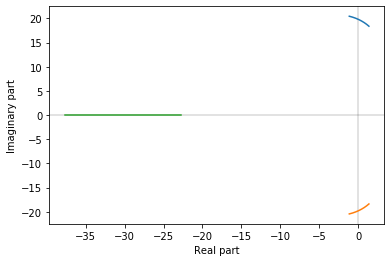

In [41]:
# Solution to 1.d
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np

A = np.array([[0,1,0],[-392,0,11.4],[0,0.137,-30]])

B = np.array([[0,0,1]]).T

def eigvals(k):
    A_cl = A-B*k
    return np.linalg.eigvals(A_cl)

k = np.linspace(-10,10,1001)
y = np.zeros((len(k),3),dtype=np.complex) # dtype=np.complex or else you will be sad
for i in range(len(k)):
    y[i,:] = eigvals(k[i])
    pass
plt.axhline(0, color='black',alpha=.15)
plt.axvline(0, color='black',alpha=.15)
plt.plot(y[:,0].real, y[:,0].imag)
plt.plot(y[:,1].real, y[:,1].imag)
plt.plot(y[:,2].real, y[:,2].imag)
plt.xlabel("Real part")
plt.ylabel("Imaginary part")



In [36]:
k

array([-100.  ,  -99.89,  -99.78, ...,    9.78,    9.89,   10.  ])